# Improving Data Visualizations

This training module was developed by Alexis Payton, Dr. Kyle R. Roell, and Dr. Julia E. Rager

Fall 2022

## Introduction to Training Module

Data visualizations are used to convey concepts and key takeaways from an analysis in a clear in succinct way. In environmental health research, this is of particular importance for high dimensional datasets that will typically have more results that need to be communicated to a reader. The best visualizations intentionally use 
- color
- ordering
- size
- minimal text, etc. 

to convey those concepts to the reader faster.

In this module, ggplot2, R's data visualization will be used to walk through ways to improve data visualizations. Two example figures will be built - a simple example constructing a box plot and a more complex example constructing a XXXXX?????

The data to be used in this module was described and referenced previously in [TAME Toolkit module 1.4](https://uncsrp.github.io/Data-Analysis-Training-Modules/high-dimensional-data-visualizations.html#high-dimensional-data-visualizations). Briefly, this dataset contains environmental chemistry data resulting from the analysis of 12 smoke samples from various biomasses under two different burn conditions. The first example boxplot will be built off the one found in TAME module 1.4 and this module improvements will be made to it. The second example...



### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [1]:
if (!requireNamespace("factoextra"))
  install.packages("factoextra");
if (!requireNamespace("MetBrewer"))
  install.packages("MetBrewer");
if (!requireNamespace("patchwork"))
  install.packages("patchwork");
if (!requireNamespace("vegan"))
  install.packages("vegan");
if (!requireNamespace("ggrepel"))
  install.packages("ggrepel");

Loading required namespace: factoextra

Loading required namespace: MetBrewer

Loading required namespace: patchwork

Loading required namespace: vegan



### Loading required R packages

In [2]:
library(ggplot2)
library(tidyverse)
library(reshape2)
library(MetBrewer)
library(factoextra)
library(patchwork)
library(vegan)
library(ggrepel)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-2



### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

### Importing example dataset
Then let's read in our example dataset. As mentioned in the introduction, this example dataset represents chemical measurements across 12 different biomass burn scenarios, representing potential wildfire events. Let's upload and view these data:

In [3]:
# Load the data
SmokeData1 <- read.csv("Input/ModuleData.csv")

# View the top of the dataset
head(SmokeData1) 

,Chemical.Category,Chemical,CASRN,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering,Units
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,n-Alkanes,2-Methylnonadecane,1560-86-7,0.06,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.13,0.06,ng_per_uL
2,n-Alkanes,3-Methylnonadecane,6418-45-7,0.04,0.04,0.90,1.13,0.72,0.04,0.04,0.47,0.77,0.04,ng_per_uL
3,n-Alkanes,Docosane,629-97-0,0.25,0.21,0.57,9.46,0.18,0.32,0.48,0.16,0.36,0.16,ng_per_uL
4,n-Alkanes,Dodecylcyclohexane,1795-17-1,0.04,0.04,0.04,0.25,0.04,0.12,0.04,0.04,0.04,0.04,ng_per_uL
5,n-Alkanes,Eicosane,112-95-8,0.25,0.11,0.54,7.55,0.16,0.28,0.29,0.17,0.38,0.15,ng_per_uL
6,n-Alkanes,Heneicosane,629-94-7,0.28,0.13,0.34,6.77,0.13,0.30,0.42,0.13,0.69,0.13,ng_per_uL


Now that we've been able to view the dataset, let's come up with a question that can be answered with our boxplot figure. This will inform how we format the dataframe for visualization.

## Traning Module's Environmental Health Questions 
This training module was specifically developed to answer the following environmental health questions:
1. Which biomass burn condition has the greatest chemical concentration?
2. ?

### Formatting dataframes for downstream visualization code
For some of the visualizations below (e.g., heat maps) we’ll use data from the original full dataframe. The only formatting that needs to be done to this dataframe is to move the chemical names to the row names position of the dataframe:

In [4]:
# Converting the chemical category column to row names
SmokeData2 = SmokeData1 %>%
    column_to_rownames(var = "Chemical")

# View the top of the reorganized dataset
head(SmokeData2)

,Chemical.Category,CASRN,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering,Units
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2-Methylnonadecane,n-Alkanes,1560-86-7,0.06,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.13,0.06,ng_per_uL
3-Methylnonadecane,n-Alkanes,6418-45-7,0.04,0.04,0.90,1.13,0.72,0.04,0.04,0.47,0.77,0.04,ng_per_uL
Docosane,n-Alkanes,629-97-0,0.25,0.21,0.57,9.46,0.18,0.32,0.48,0.16,0.36,0.16,ng_per_uL
Dodecylcyclohexane,n-Alkanes,1795-17-1,0.04,0.04,0.04,0.25,0.04,0.12,0.04,0.04,0.04,0.04,ng_per_uL
Eicosane,n-Alkanes,112-95-8,0.25,0.11,0.54,7.55,0.16,0.28,0.29,0.17,0.38,0.15,ng_per_uL
Heneicosane,n-Alkanes,629-94-7,0.28,0.13,0.34,6.77,0.13,0.30,0.42,0.13,0.69,0.13,ng_per_uL


In [5]:
# Creating a smaller dataframe to work with 
SmokeData3 = SmokeData2[,3:12]

# Viewing the dataframe
head(SmokeData3)

# scaling the data
ScaledData = t(scale(t(SmokeData3)))
head(ScaledData)

,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2-Methylnonadecane,0.06,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.13,0.06
3-Methylnonadecane,0.04,0.04,0.90,1.13,0.72,0.04,0.04,0.47,0.77,0.04
Docosane,0.25,0.21,0.57,9.46,0.18,0.32,0.48,0.16,0.36,0.16
Dodecylcyclohexane,0.04,0.04,0.04,0.25,0.04,0.12,0.04,0.04,0.04,0.04
Eicosane,0.25,0.11,0.54,7.55,0.16,0.28,0.29,0.17,0.38,0.15
Heneicosane,0.28,0.13,0.34,6.77,0.13,0.30,0.42,0.13,0.69,0.13


,EucalyptusFlaming,EucalyptusSmoldering,PeatFlaming,PeatSmoldering,PineNeedlesFlaming,PineNeedlesSmoldering,PineFlaming,PineSmoldering,RedOakFlaming,RedOakSmoldering
2-Methylnonadecane,-0.3347765,-0.3347765,-0.3347765,2.841935,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.1637228,-0.3347765
3-Methylnonadecane,-0.8794448,-0.8794448,1.1161291,1.649829,0.6984509,-0.8794448,-0.8794448,0.1183422,0.8144726,-0.8794448
Docosane,-0.3327216,-0.3465132,-0.2223890,2.842787,-0.3568568,-0.3085863,-0.2534201,-0.3637526,-0.2947948,-0.3637526
Dodecylcyclohexane,-0.4240624,-0.4240624,-0.4240624,2.646734,-0.4240624,0.7457649,-0.4240624,-0.4240624,-0.4240624,-0.4240624
Eicosane,-0.3195928,-0.3802202,-0.1940076,2.841691,-0.3585675,-0.3066012,-0.3022707,-0.3542370,-0.2632960,-0.3628981
Heneicosane,-0.3166775,-0.3895328,-0.2875354,2.835527,-0.3895328,-0.3069635,-0.2486793,-0.3895328,-0.1175398,-0.3895328


In [6]:
# Melting the data, which converts the data into a longer format 
ScaledData.melt <- melt(ScaledData)

# Updating the column names
colnames(ScaledData.melt) <- c("Chemical", "Biomass_Burn_Condition", 
                               "Scaled_Chemical_Concentration") 
head(ScaledData.melt)

,Chemical,Biomass_Burn_Condition,Scaled_Chemical_Concentration
,<fct>,<fct>,<dbl>
1,2-Methylnonadecane,EucalyptusFlaming,-0.3347765
2,3-Methylnonadecane,EucalyptusFlaming,-0.8794448
3,Docosane,EucalyptusFlaming,-0.3327216
4,Dodecylcyclohexane,EucalyptusFlaming,-0.4240624
5,Eicosane,EucalyptusFlaming,-0.3195928
6,Heneicosane,EucalyptusFlaming,-0.3166775


### Original Version from TAME Module 1.4

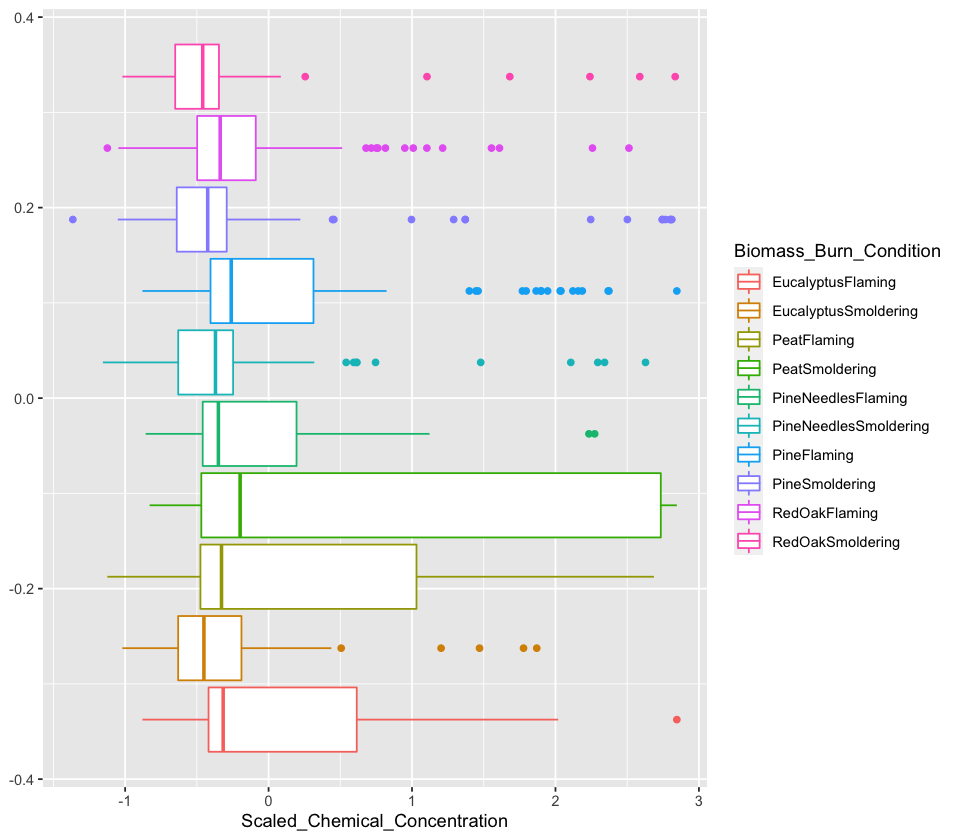

In [7]:
options(repr.plot.width=8, repr.plot.height=7) #changing size
ggplot(data = ScaledData.melt, aes(x = Scaled_Chemical_Concentration, color = Biomass_Burn_Condition)) + 
  geom_boxplot()

### There are three main aspects we can adjust on this figure:
 **1. The order of the box plots.**
 
   Ordering the biomass burn conditions from highest to lowest based on their median scaled chemical concentration allows the reader to easily determine the biomass burn condition that had the greatest or least chemical concentrations relative to each other. In R, this can be done by putting the biomass_burn_condition variable into a factor.
      
**2. The legibility of the text in the legend and axes.**

   Creating spaces between the text or exchanging the underscores for spaces improves the legibility of the figure. 
     
**3. Use of color.**

   In figures variables can be visualized using color, text, size, etc. In this figure, it is redundant to have the biomass burn condition encoded in the legend and the color. Instead this variable can be put on the y axis and the legend will be removed to be more concise. The shades of the colors will also be changed, but to keep each burn condition distinct colors will be chosen that are distinct from one another. 

In [8]:
# First adding spaces beteween the biomass burn conditions
ScaledData.melt.spaces = ScaledData.melt %>%
    mutate(Biomass_Burn_Condition = ifelse(Biomass_Burn_Condition =="RedOakSmoldering", "Red Oak Smoldering",
                ifelse(Biomass_Burn_Condition =="RedOakFlaming", "Red Oak Flaming",
                    ifelse(Biomass_Burn_Condition =="EucalyptusSmoldering", "Eucalyptus Smoldering",
                        ifelse(Biomass_Burn_Condition =="EucalyptusFlaming", "Eucalyptus Flaming",
                            ifelse(Biomass_Burn_Condition =="PineSmoldering", "Pine Smoldering",
                                ifelse(Biomass_Burn_Condition =="PineFlaming", "Pine Flaming",
                                    ifelse(Biomass_Burn_Condition =="PineNeedlesSmoldering", "Pine Needles Smoldering",
                                        ifelse(Biomass_Burn_Condition =="PineNeedlesFlaming", "Pine Needles Flaming",
                                            ifelse(Biomass_Burn_Condition =="PeatSmoldering", "Peat Smoldering",
                                                  ifelse(Biomass_Burn_Condition =="PeatFlaming", "Peat Flaming",
                                                         NA)))))))))))
# Viewing dataframe
head(ScaledData.melt.spaces)

,Chemical,Biomass_Burn_Condition,Scaled_Chemical_Concentration
,<fct>,<chr>,<dbl>
1,2-Methylnonadecane,Eucalyptus Flaming,-0.3347765
2,3-Methylnonadecane,Eucalyptus Flaming,-0.8794448
3,Docosane,Eucalyptus Flaming,-0.3327216
4,Dodecylcyclohexane,Eucalyptus Flaming,-0.4240624
5,Eicosane,Eucalyptus Flaming,-0.3195928
6,Heneicosane,Eucalyptus Flaming,-0.3166775


In [9]:
# Factor the biomass_burn_condition by the median scaled_chemical_concentration
median_concentration_data = ScaledData.melt.spaces %>%
    group_by(Biomass_Burn_Condition) %>%
    summarize(Median_Concentration = median(Scaled_Chemical_Concentration)) %>%
    arrange(Median_Concentration)

head(median_concentration_data)

# Saving that order
median_biomass_order = median_concentration_data$Biomass_Burn_Condition

Biomass_Burn_Condition,Median_Concentration
<chr>,<dbl>
Red Oak Smoldering,-0.4590961
Eucalyptus Smoldering,-0.4508589
Pine Smoldering,-0.4244289
Pine Needles Smoldering,-0.3702707
Pine Needles Flaming,-0.3498902
Red Oak Flaming,-0.3373308


### Improved Version

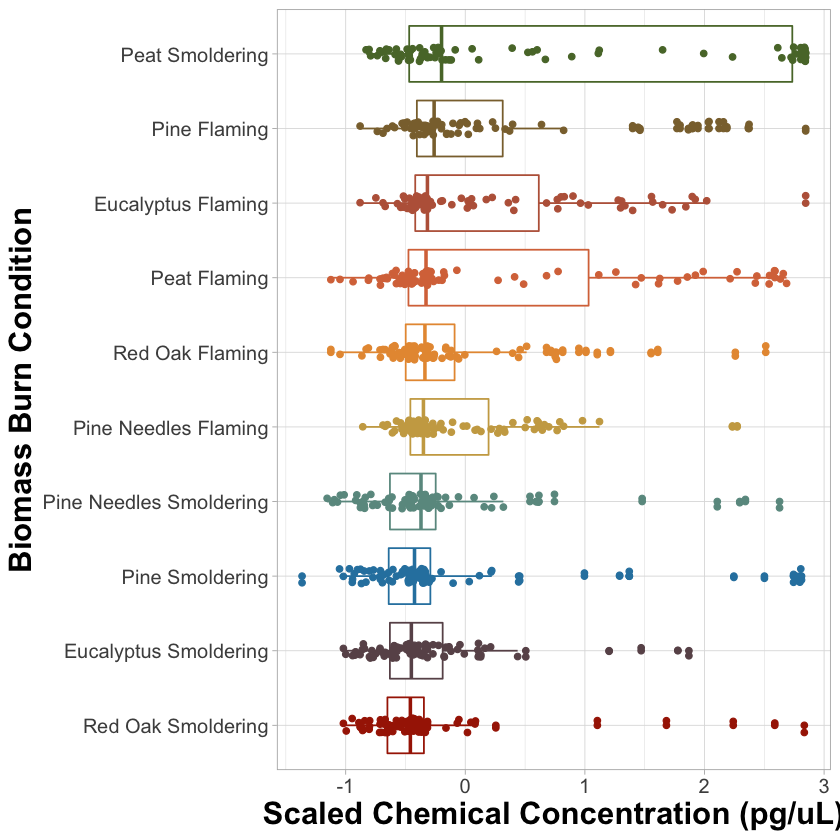

In [10]:
options(repr.plot.width=7, repr.plot.height=7) #changing size

# Putting into factor to organize the burn conditions
ScaledData.melt.spaces$Biomass_Burn_Condition = factor(ScaledData.melt.spaces$Biomass_Burn_Condition, levels = median_biomass_order)

# Choosing palette from package
metbrewer_colors = met.brewer(name = "Juarez", n = 12)[1:12]

ggplot(data = ScaledData.melt.spaces, aes(x = Scaled_Chemical_Concentration, y = Biomass_Burn_Condition, 
                                   color = Biomass_Burn_Condition)) + 
  geom_boxplot() +
  geom_point(position = position_jitter(h = 0.1)) + # jittering the points, so they're not all on top of each other

  theme_light() + # changing the theme
  theme(axis.text = element_text(size = 12), # changing size of x axis labels
      axis.title = element_text(face = "bold", size = rel(1.7)), # changes axis titles
      legend.position = "none") + # changes legend text

  xlab('Scaled Chemical Concentration (pg/uL)') + ylab('Biomass Burn Condition') + # changing axis labels 
  scale_color_manual(values = c(metbrewer_colors))

You may notice that the scaled chemical concentration was put on the x axis and burn condition was put on the y axis and not vice versa. When names are longer the names are more legible if that variable is placed on the y axis.

Other aspects of the figure were changed in the latest version, but those are minor compared to changing the order of the boxplots, revamping the text, and the usage of color. RStudio provides a [ggplot2 cheat sheet](https://www.rstudio.com/resources/cheatsheets/) for changing a figure's parameters. 

# Question #2: 

### Importing example dataset
This dataset contains...

In [18]:
library(readxl)

cytokine_data = data.frame(read_excel("Input/CytokineData_102920.xlsx", sheet = 2))

# View the top of the dataset
head(cytokine_data)

,Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,E_C_F_002,IFNg,17.642316,4.220509,NELF,1,NS,NS_1
2,E_C_F_002,IL10,2.873724,1.953721,NELF,1,NS,NS_1
3,E_C_F_002,IL12p70,1.625272,1.392467,NELF,1,NS,NS_1
4,E_C_F_002,IL13,36.117692,5.214035,NELF,1,NS,NS_1
5,E_C_F_002,IL1b,104.409217,6.719857,NELF,1,NS,NS_1
6,E_C_F_002,IL6,21.159536,4.469856,NELF,1,NS,NS_1


### Formatting dataframe for downstream visualization code

In [19]:
# Splitting the dataframe within each category to perform PCA on each compartment separately
split_cytokine_data = cytokine_data %>%
    group_by(Compartment) %>%
    group_split()

NLF_data = split_cytokine_data[[2]] # NLF
NELF_data = split_cytokine_data[[1]] # NELF
sputum_data = split_cytokine_data[[4]] # sputum
serum_data = split_cytokine_data[[3]] # serum

# Reshaping the data putting subject ids as the rows and the protein as the columns
pca_prep_NLF_data <- reshape2::dcast(NLF_data, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 
pca_prep_NELF_data <- reshape2::dcast(NELF_data, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 
pca_prep_sputum_data <- reshape2::dcast(sputum_data, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 
pca_prep_serum_data <- reshape2::dcast(serum_data, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 

# Background filter eliminating any cytokines that are not expressed in a compartment  
pca_prep_NLF_data$I309 <- NULL
pca_prep_sputum_data$I309 <- NULL

# Viewing data
head(pca_prep_NLF_data)

,Eotaxin,Eotaxin3,Fractalkine,IFNg,IL10,IL12p70,IL13,IL17B,IL17D,IL1b,⋯,IL6,IL8,IP10,ITAC,MCP1,MIG,MIP1a,MIP1b,TARC,TNFa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CS_15,0.000000,3.038643,9.636227,0.000000,0.14893463,0.07469627,2.207063,0.6256351,1.8301329,1.107784,⋯,0.3908391,9.086325,7.061425,3.498878,5.441440,8.537734,2.221396,1.707346,0.000000,0.51280805
CS_16,6.163727,3.613655,10.187516,1.950766,1.27894590,0.65261981,4.469849,2.3134686,2.9811763,5.618246,⋯,3.5291829,10.849439,10.185456,5.843138,6.378714,9.624979,3.399035,4.104372,1.948876,2.85911002
CS_17,3.713489,3.700294,11.048498,0.000000,0.13293875,0.92715290,3.367642,3.1315019,1.1597726,3.036496,⋯,4.1125851,11.153075,9.734703,2.169828,6.349178,6.100281,1.974294,3.042272,1.993956,1.34720761
CS_18,5.192319,3.725884,10.853572,2.046930,0.08873065,0.00000000,1.354363,3.4258250,0.7740756,2.584225,⋯,1.0910076,9.780520,13.189708,4.766194,5.381405,9.516039,2.634565,2.549122,2.683546,0.08963907
CS_19,7.690446,3.313601,11.180747,3.456155,1.61110773,1.25875198,4.999383,2.9672221,3.5146895,5.591556,⋯,6.2319868,10.870907,11.405130,7.329651,6.657583,11.704121,4.280921,5.847280,3.680552,3.59674526
CS_20,5.649213,4.553713,12.542214,0.000000,0.10019654,0.71096657,2.103436,3.5997751,0.9149816,2.221075,⋯,2.6196326,10.280923,9.715958,2.024822,7.051569,6.106692,4.160397,3.876557,3.765043,0.78475311


### Performing PCA

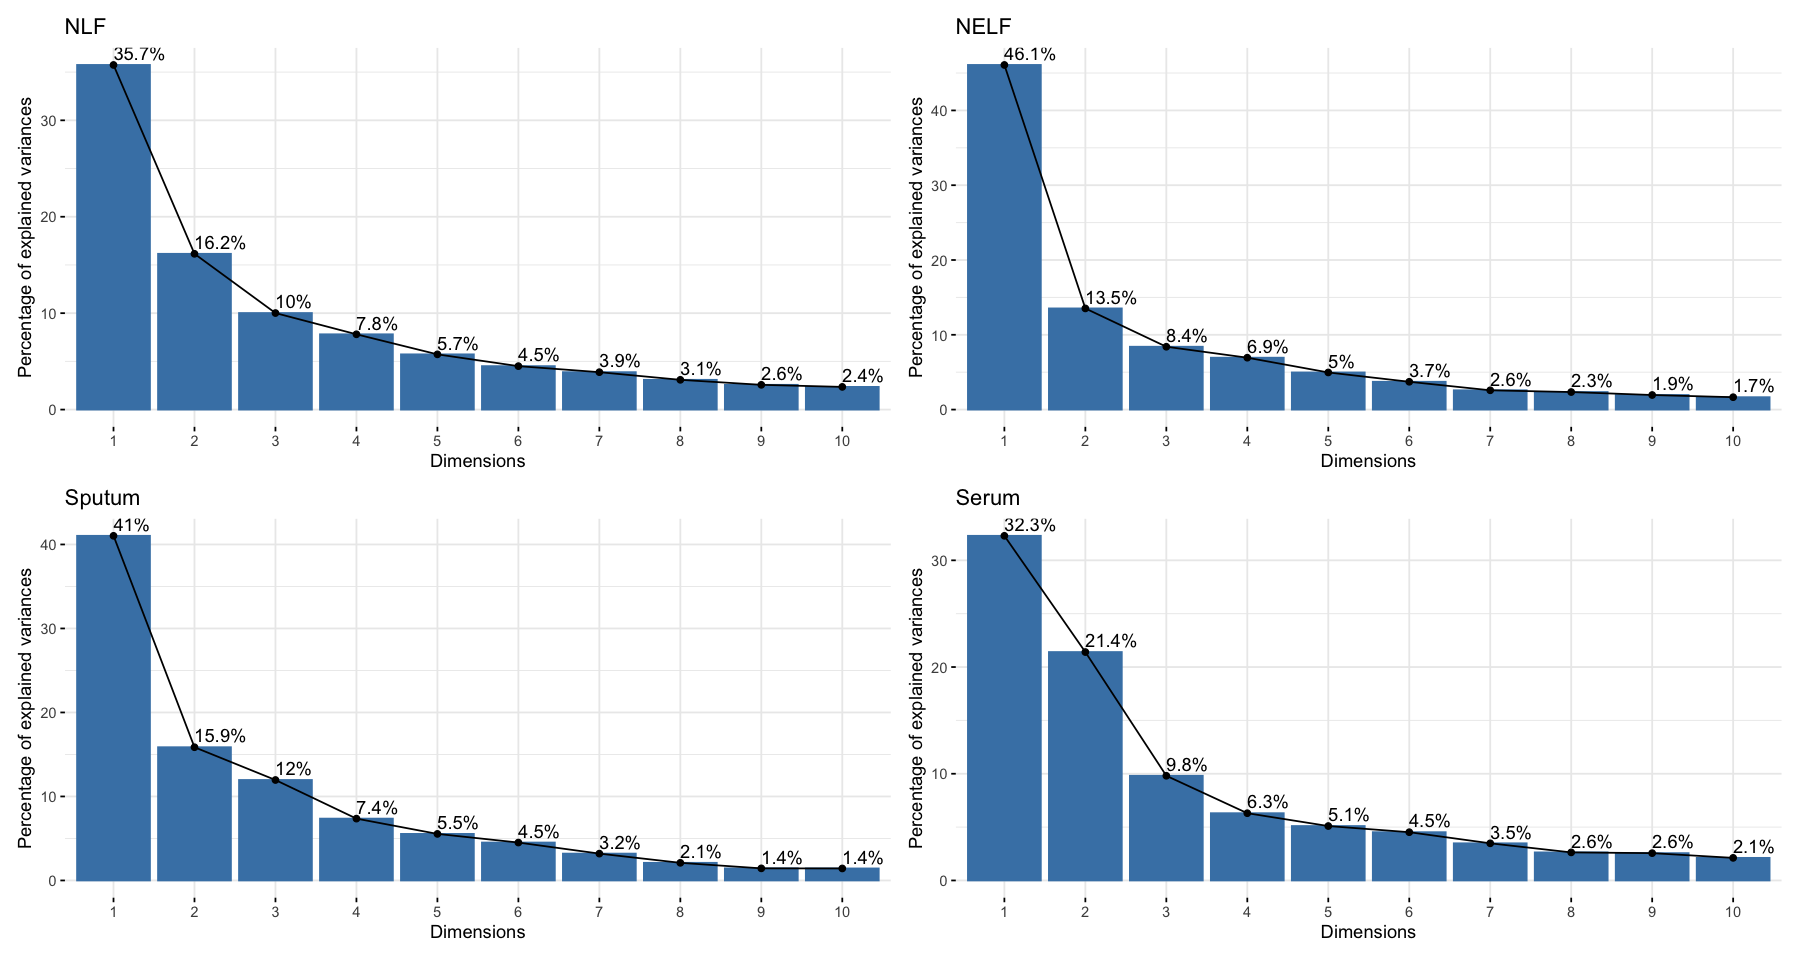

In [20]:
pca_NLF = prcomp(pca_prep_NLF_data, scale = TRUE, center = TRUE)
pca_NELF = prcomp(pca_prep_NELF_data, scale = TRUE, center = TRUE)
pca_sputum = prcomp(pca_prep_sputum_data, scale = TRUE, center = TRUE)
pca_serum = prcomp(pca_prep_serum_data, scale = TRUE, center = TRUE)

# Viewing scree plots to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width=15, repr.plot.height=8) #changing size

pca_plot_NLF = fviz_eig(pca_NLF, addlabels = TRUE, center = TRUE) + ggtitle("NLF")
pca_plot_NELF = fviz_eig(pca_NELF, addlabels = TRUE, center = TRUE) + ggtitle("NELF")
pca_plot_sputum = fviz_eig(pca_sputum, addlabels = TRUE, center = TRUE) + ggtitle("Sputum")
pca_plot_serum = fviz_eig(pca_serum, addlabels = TRUE, center = TRUE) + ggtitle("Serum")

pca_plot_NLF + pca_plot_NELF + pca_plot_sputum + pca_plot_serum

### Extracting eigenvector values

In [21]:
NLF_scores <-as.data.frame(scores(pca_NLF))
NELF_scores <-as.data.frame(scores(pca_NELF))
sputum_scores <-as.data.frame(scores(pca_sputum))
serum_scores <-as.data.frame(scores(pca_serum))

# adding in a column for protein and the compartment names
NLF_scores = NLF_scores %>%
    rownames_to_column(var = "Protein")
NLF_scores$Compartment = rep("NLF", times = length(NLF_scores$PC1))
NELF_scores = NELF_scores %>%
    rownames_to_column(var = "Protein")
NELF_scores$Compartment = rep("NELF", times = length(NELF_scores$PC1))
sputum_scores = sputum_scores %>%
    rownames_to_column(var = "Protein")
sputum_scores$Compartment = rep("Sputum", times = length(sputum_scores$PC1))
serum_scores = serum_scores %>%
    rownames_to_column(var = "Protein")
serum_scores$Compartment = rep("Serum", times = length(serum_scores$PC1))

# Viewing one dataframe
head(NLF_scores)

,Protein,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,⋯,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Compartment
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CS_15,-4.1547415,3.0124249,0.31513204,-0.6642597,-0.2402107,0.8701267,-1.2005267,0.49440100,-0.2856702,⋯,-0.1051587,0.3118319,-0.4222719,-0.42922528,-0.04949429,0.053877601,0.125389194,-0.175764340,0.30138912,NLF
2,CS_16,4.3899840,2.9095065,0.87971148,0.7590932,0.1449308,1.1701827,0.8664194,-0.53888300,0.6031193,⋯,0.3726338,0.6436831,0.1435854,-0.09612738,0.26146439,0.128670237,0.681190505,-0.241012054,0.21388398,NLF
3,CS_17,0.5084402,-0.2943096,-0.24905761,0.9376157,-1.5165702,2.2514341,-1.0979997,-0.08044652,-1.0924307,⋯,-0.2178005,0.3654499,-0.4965830,-0.19954641,-0.14731352,-0.114114639,0.188361520,-0.009257592,0.01576958,NLF
4,CS_18,-1.3021892,-0.1357047,-0.40942731,-1.3584575,0.4955198,-1.3223889,0.6109737,-0.84512934,-0.6207483,⋯,0.3376079,-0.4778354,0.8350768,-0.15859894,0.39806106,-0.122723082,0.003197279,-0.323396084,0.27405920,NLF
5,CS_19,8.2930692,2.8626294,-0.43843935,0.1342707,0.5042113,1.3816861,1.0071259,-1.61856897,0.1491869,⋯,-0.1985557,0.4593065,0.2517783,0.15130915,0.14367957,0.002928160,-0.087592640,-0.022219505,-0.09609880,NLF
6,CS_20,0.7032467,-2.2983680,0.07901229,-0.8102670,-0.9227998,-0.0981151,-0.4940019,-0.68521798,-1.7195624,⋯,-0.2675091,0.3932076,-0.1953773,-0.19522770,-0.06451950,-0.007583426,0.354012462,-0.300369221,-0.01546600,NLF


### Coercing into one dataframe for easier plotting

In [27]:
cytokine_eigenvector_values = rbind(NLF_scores[,c(1:3,23)], NELF_scores[,c(1:3,24)], sputum_scores[,c(1:3,23)], serum_scores[,c(1:3,24)])

# Putting the compartment into a factor to specify the order in the plot below
cytokine_eigenvector_values$Compartment = factor(cytokine_eigenvector_values$Compartment, levels = c("NLF", "NELF", "Sputum", "Serum"))

colnames(cytokine_eigenvector_values) = c("SubjectID", "PC1", "PC2", "Compartment")
# Adding in original smoking groups
final_data = inner_join(cytokine_data %>%
                         select(c("SubjectID", "Group", "Conc_pslog2")), cytokine_eigenvector_values)
# Viewing data
head(final_data)

Joining, by = "SubjectID"


,SubjectID,Group,Conc_pslog2,PC1,PC2,Compartment
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,NS_1,NS,4.220509,0.463357,1.898504,NLF
2,NS_1,NS,4.220509,3.394340,2.276351,NELF
3,NS_1,NS,4.220509,4.415415,2.238279,Sputum
4,NS_1,NS,4.220509,-2.297520,2.208247,Serum
5,NS_1,NS,1.953721,0.463357,1.898504,NLF
6,NS_1,NS,1.953721,3.394340,2.276351,NELF


### PCA Plot

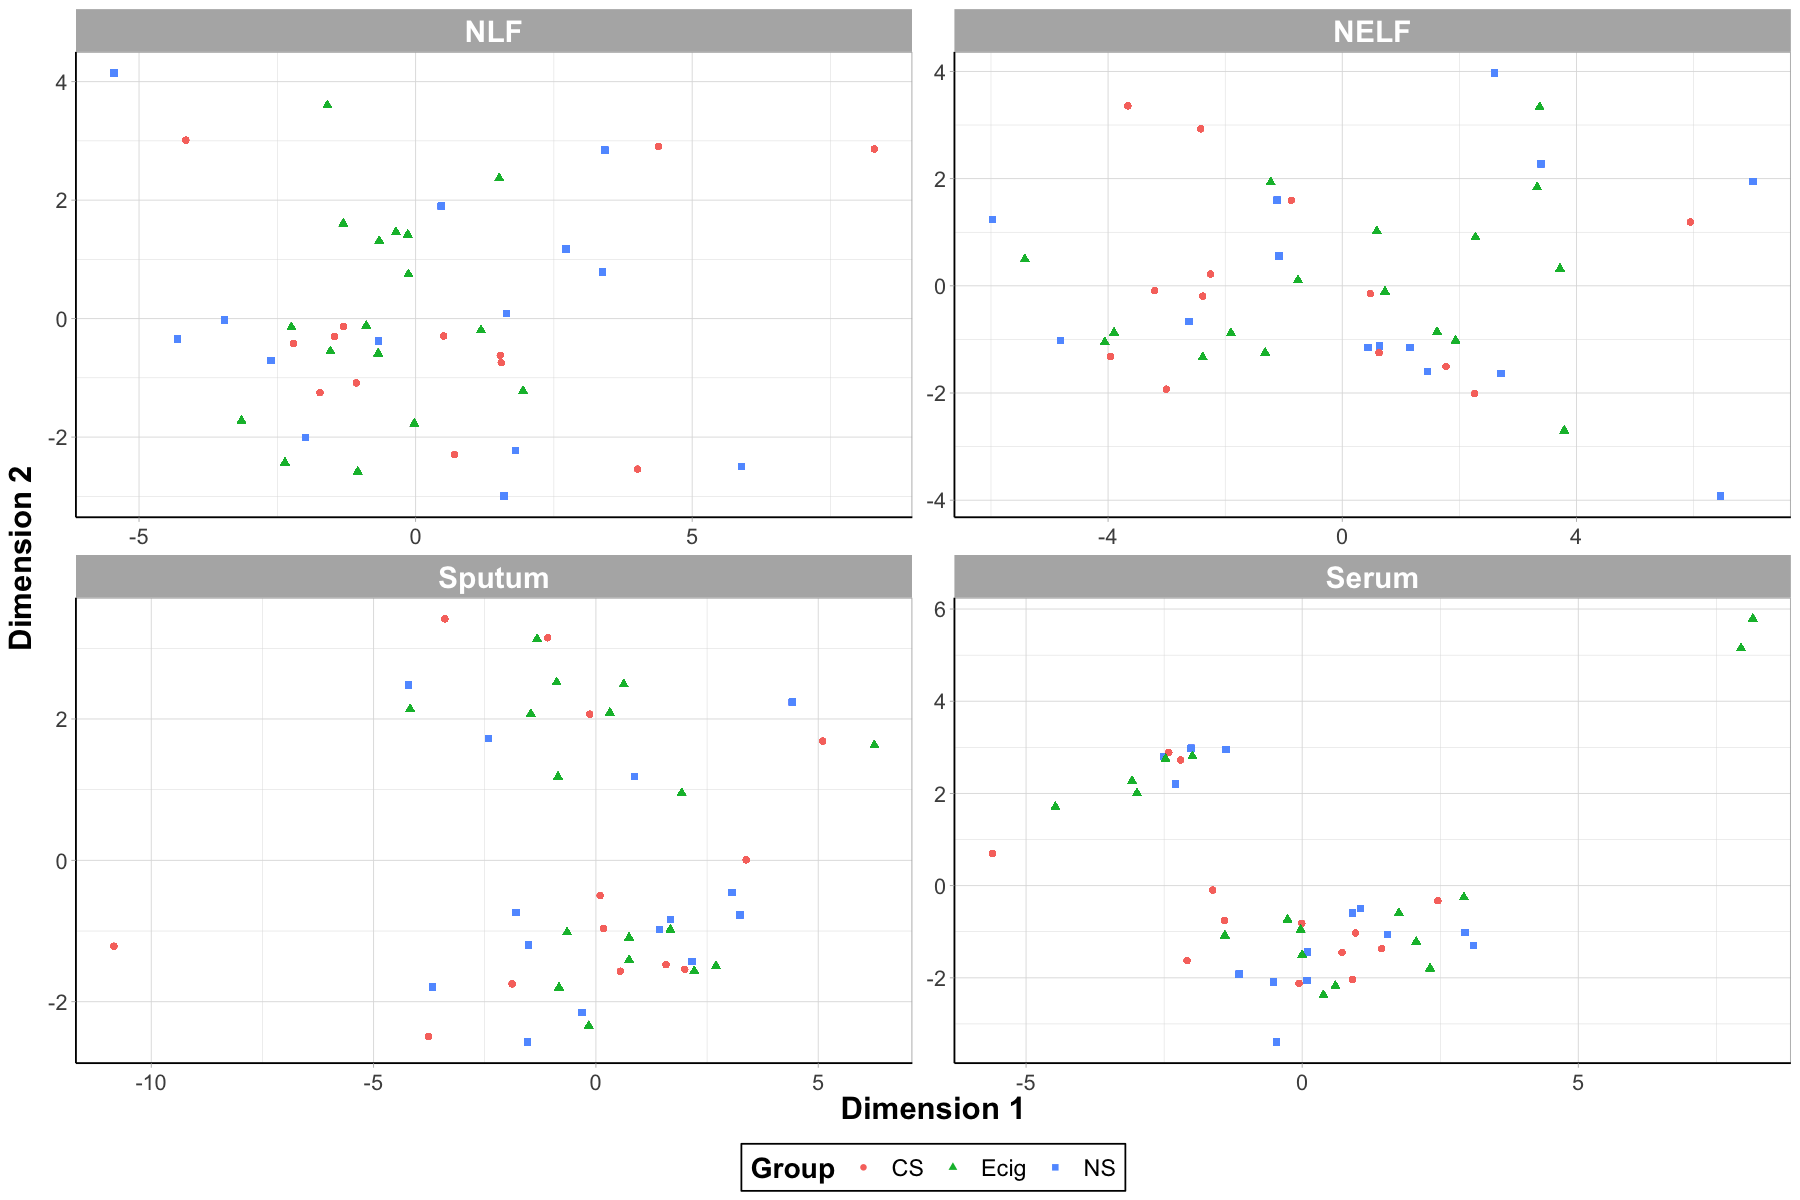

In [31]:
options(repr.plot.width=15, repr.plot.height=10) #changing size
ggplot(data = final_data, aes(x = PC1, y = PC2, color = Group, shape = Group), size = 8) + 
  geom_point() +
#   geom_text_repel(aes(label = Protein), 
#                   show.legend = FALSE, size = 4.5) + 
  

  facet_wrap(~Compartment, scales = 'free') + 

  theme_light() + 
  theme(axis.text.x = element_text(vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 13), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 17), #changes legend title
        legend.text = element_text(size = 14), #changes legend text
        legend.position = 'bottom',
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 18, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 18, face = "bold")) + #changes size of facet y axis 
  xlab('Dimension 1') + ylab('Dimension 2')  #changing axis labels 

## Additional Resources
- https://blog.datawrapper.de/colorguide/
- https://ggplot2-book.org/
- https://towardsdatascience.com/beginners-guide-to-enhancing-visualizations-in-r-9fa5a00927c9